In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# prompt: install tensorflow gpu

!pip install tensorflow


In [1]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
#import basic lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
#featureengineering

In [10]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [11]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [12]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [13]:
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
# prompt: why my data is showing true false instead of 0 1

X = pd.concat([X,geography,gender],axis=1)
X = X.astype(int) # convert boolean columns to integers
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#

In [18]:
#featurecaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test


array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
X_train.shape

(8000, 11)

In [22]:
#ANN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
#initialize ANN
classifier=Sequential()

In [25]:
#ADD input Layer
classifier.add(Dense(units=11,activation='relu'))

In [26]:
#adding first hidden lqyer

In [27]:
classifier.add(Dense(units=7,activation='relu'))

In [28]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [32]:
#add outout layer
classifier.add(Dropout(0.3))

In [33]:
classifier.add(Dense(1,activation='sigmoid'))

In [34]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
#Early stoping
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [36]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=earlystopping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6964 - loss: 0.5936 - val_accuracy: 0.8023 - val_loss: 0.4522
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8045 - loss: 0.4527 - val_accuracy: 0.8069 - val_loss: 0.4292
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4336 - val_accuracy: 0.8198 - val_loss: 0.4165
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4114 - val_accuracy: 0.8236 - val_loss: 0.4087
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8347 - loss: 0.4189 - val_accuracy: 0.8334 - val_loss: 0.3992
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8349 - loss: 0.4052 - val_accuracy: 0.8402 - val_loss: 0.3862
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.3938 - val_accuracy: 0.8429 - val_loss: 0.3746
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8502 - loss: 0.3859 - val_accuracy: 0.

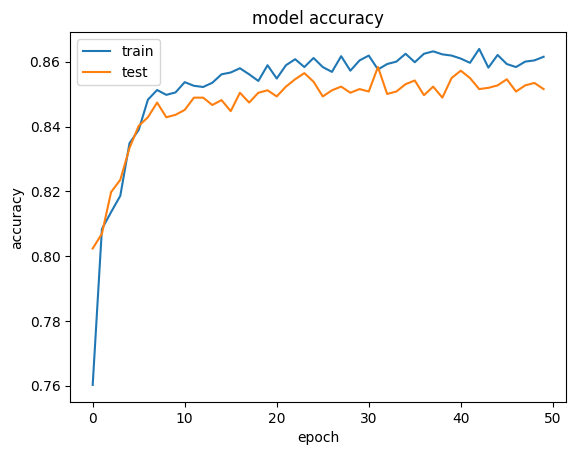

In [37]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1533,   62],
       [ 220,  185]])

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [41]:
score

0.859

In [42]:
import pickle

In [45]:
with open('model.pkl', 'wb') as f:
    pickle.dump(classifier,f)

In [46]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)